In [173]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

In [174]:
R = 1

def evaluateVolume(Dim, N, Ness=100):
# Fonction qui prend la moyenne de Ness essai de calcul du volume 
# d'une sphère en Dim dimensions avec N points
    V_sphere = np.zeros(Ness)
    for i in range(Ness):
        N_int =0
        N_tot = 0
        V_tot=(2*R)**Dim
        for n in range(N):  
            # np.random.seed()  
            # random_point = np.random.uniform(low=-R, high=R, size=Dim)
            random_list = [random.uniform(-R, R) for _ in range(Dim)]
            # if np.sum(random_point**2) <= R**2:
            if sum(x**2 for x in random_list) <= R**2:
                N_int += 1
            N_tot+=1

        V_sphere[i] = N_int/N_tot*V_tot
    return np.mean(V_sphere), np.std(V_sphere) 

results=[]
for dim in [3, 6]:
    for n in 100*np.array([1, 2, 4, 8, 16]):
        volume, incertitude = evaluateVolume(dim, n)
        volume_th = np.pi**((dim/2))/math.gamma(dim/2 + 1)
        error = np.abs((volume - volume_th)/volume_th)
        results.append({'Dim': dim, 'N': n, 'Vol': volume,'Vol_th' : volume_th, 'Inc' : incertitude, 'Err_rel' : error})
        
df = pd.DataFrame(results)
print(df)


   Dim     N      Vol    Vol_th       Inc   Err_rel
0    3   100  4.15120  4.188790  0.450691  0.008974
1    3   200  4.23760  4.188790  0.270100  0.011652
2    3   400  4.16620  4.188790  0.189224  0.005393
3    3   800  4.18820  4.188790  0.133202  0.000141
4    3  1600  4.20145  4.188790  0.095975  0.003022
5    6   100  5.13280  5.167713  1.941174  0.006756
6    6   200  5.02720  5.167713  1.211186  0.027191
7    6   400  5.17920  5.167713  0.857055  0.002223
8    6   800  5.20080  5.167713  0.613605  0.006403
9    6  1600  5.17680  5.167713  0.482035  0.001758


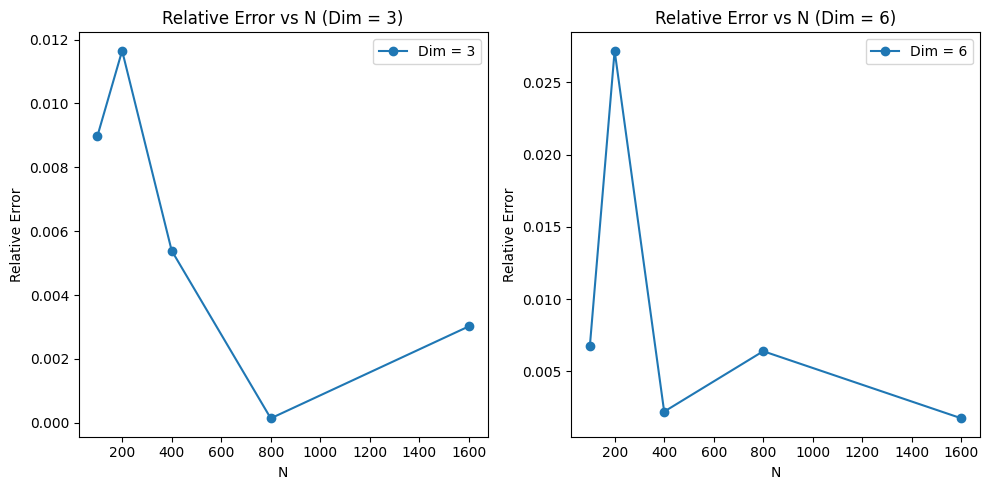

In [175]:
# Separate DataFrames for each dimension
df_dim3 = df[df['Dim'] == 3]
df_dim6 = df[df['Dim'] == 6]

# Plotting
plt.figure(figsize=(10, 5))

# Plot for Dim = 3
plt.subplot(1, 2, 1)
plt.plot(df_dim3['N'], df_dim3['Err_rel'], marker='o', label='Dim = 3')
plt.title('Relative Error vs N (Dim = 3)')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

# Plot for Dim = 6
plt.subplot(1, 2, 2)
plt.plot(df_dim6['N'], df_dim6['Err_rel'], marker='o', label='Dim = 6')
plt.title('Relative Error vs N (Dim = 6)')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

plt.tight_layout()
plt.show()